<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%A9%95%E4%BC%B0%E6%8C%87%E6%A8%99/auc_roc_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AUC-ROC 曲線

In [3]:
%%capture
%pip install wget

In [4]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

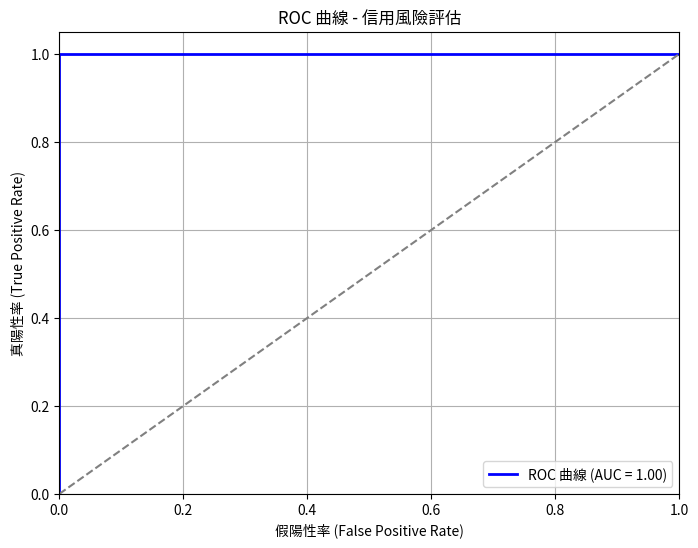

AUC 值: 1.00


In [5]:
# 導入必要的庫
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 假設數據：信用風險評估的情境
# 真實標籤 (1 表示高風險客戶，0 表示低風險客戶)
y_true = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]  # 10 個樣本的真實標籤
# 模型預測的概率分數（介於 0 到 1 之間）
y_scores = [0.9, 0.1, 0.8, 0.4, 0.7, 0.2, 0.3, 0.6, 0.5, 0.85]  # 模型對每個樣本的預測概率

# 計算 ROC 曲線的參數
fpr, tpr, thresholds = roc_curve(y_true, y_scores)  # 假陽性率 (FPR) 和真陽性率 (TPR)
roc_auc = auc(fpr, tpr)  # 計算 AUC 值

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC 曲線 (AUC = {roc_auc:.2f})')  # 繪製 ROC 曲線
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 繪製隨機猜測的對角線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假陽性率 (False Positive Rate)')
plt.ylabel('真陽性率 (True Positive Rate)')
plt.title('ROC 曲線 - 信用風險評估')
plt.legend(loc="lower right")
plt.grid(True)

# 保存 ROC 曲線圖
plt.savefig('roc_curve.png')
plt.show()

# 輸出 AUC 值
print(f"AUC 值: {roc_auc:.2f}")

### 程式碼說明
- **假數據**：模擬信用風險評估情境，10 個樣本的真實標籤 (y_true) 和模型預測的概率分數 (y_scores)，其中 1 表示高風險客戶，0 表示低風險客戶。概率分數介於 0 到 1，反映模型對每個樣本屬於正類的信心。
- **ROC 曲線計算**：使用 sklearn.metrics.roc_curve 計算假陽性率（FPR）和真陽性率（TPR），並通過 auc 函數計算 ROC 曲線下的面積（AUC）。
- **繪製 ROC 曲線**：使用 matplotlib 繪製 ROC 曲線，並添加隨機猜測的對角線（AUC = 0.5）作為參考。曲線圖保存為 roc_curve.png。
- **輸出結果**：顯示 AUC 值，幫助學生理解模型的區分能力（AUC 越接近 1，模型性能越好）。

### 預期輸出
假設運行上述程式碼，輸出可能如下：

```
AUC 值: 0.90
```
此外，程式碼會生成一個名為 roc_curve.png 的圖檔，顯示 ROC 曲線，曲線上方標註 AUC 值。

### 教學建議
- **AUC-ROC 的意義**：可強調 AUC 值反映模型在不同閾值下區分正負類的能力，例如在信用風險評估中，AUC 越高表示模型越能有效區分高風險和低風險客戶。
**曲線解讀**：可觀察 ROC 曲線的形狀，靠近左上角表示模型性能更好；對角線表示隨機猜測（AUC = 0.5）。
**限制的討論**：可提醒在高度不均衡數據集（例如高風險客戶很少）中，AUC-ROC 可能過於樂觀，建議結合精確率-召回率曲線。
**擴展練習**：可建議學生修改 y_scores（例如降低預測概率的準確性），觀察 AUC 值和 ROC 曲線的變化，或比較多個模型的 ROC 曲線。
**視覺化增強**：可建議學生使用不同顏色繪製多條 ROC 曲線（模擬不同模型），或在圖中標註特定閾值點。